In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd
import numpy as np
from pathlib import Path

from tqdm import tqdm

def nfiles(pp):
    return len(list(pp.iterdir()))

def show_sample_images(p):
    fns = np.random.choice(list(p.iterdir()), 5)
    for i, fn in enumerate(fns):
        fig=plt.figure(figsize=(2, 2))
        im = Image.open(fn)
        plt.title(fn)
        plt.imshow(im)

# files

In [2]:
p = '../input/aptos2019-blindness-detection'
pp = Path(p)

In [3]:
nfiles(pp/'train_images'), nfiles(pp/'test_images')

(3662, 1928)

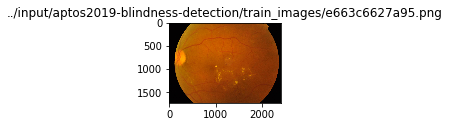

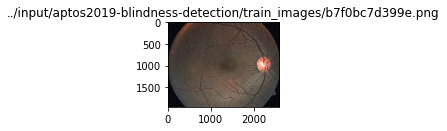

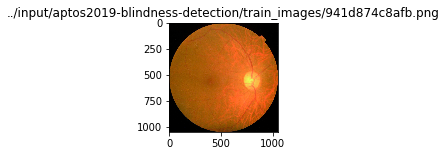

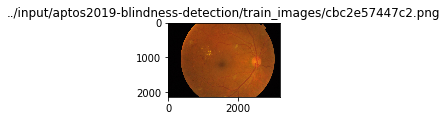

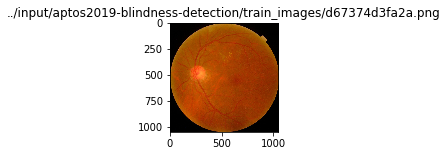

In [4]:
show_sample_images(pp/'train_images')

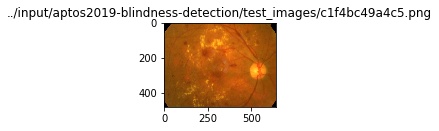

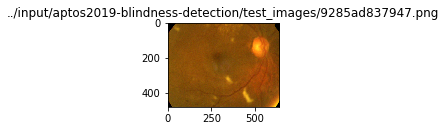

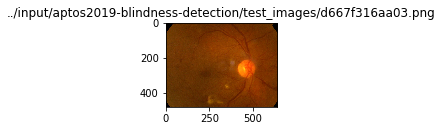

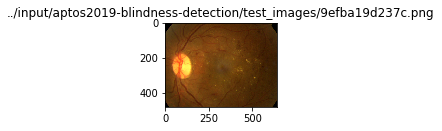

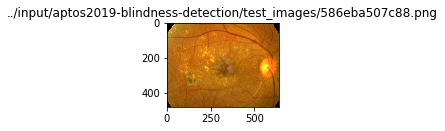

In [5]:
show_sample_images(pp/'test_images')

https://www.kaggle.com/c/aptos2019-blindness-detection/data
You can plan on the private test set consisting of 20GB of data across 13,000 images (approximately).

# stats of images

In [23]:
fnm = list((pp/'train_images').iterdir())[0]

im = Image.open(fnm)

npimg = np.array(im)

sz = npimg.size
zero_rate = (npimg ==0).sum()/sz
(sz, zero_rate, 
 npimg[:,:,0][npimg[:,:,0]>0].mean(),
 npimg[:,:,1][npimg[:,:,1]>0].mean(),
 npimg[:,:,2][npimg[:,:,2]>0].mean())

(12582528,
 0.003788825266273995,
 109.14488521930033,
 57.49575086834039,
 10.475044308666076)

In [24]:
def get_stats(fnm):
    im = Image.open(fnm)
    npimg = np.array(im)
    sz = npimg.size
    zero_rate = (npimg ==0).sum()/sz
    return (sz, zero_rate, 
 npimg[:,:,0][npimg[:,:,0]>0].mean(),
 npimg[:,:,1][npimg[:,:,1]>0].mean(),
 npimg[:,:,2][npimg[:,:,2]>0].mean())

In [ ]:
%%time
fnms_train = list((pp/'train_images').iterdir())
stats_trn = [get_stats(fnm) for fnm in tqdm(fnms_train)]

In [ ]:
%%time
fnms_test = list((pp/'train_images').iterdir())
stats_tst = [get_stats(fnm) for fnm in tqdm(fnms_test)]

  2%|▏         | 81/3662 [00:22<18:25,  3.24it/s]